# Case Study on Correlation and Regression

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load sales data from Add_sales_data_2018.csv file to data set salesdata
salesdata=pd.read_csv("D:\python\DSACaseStudy\Add_sales_data_2018.csv")
## Show first five rows in the data set
salesdata.head(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
## Display the shape - total number of rows and columns in the data set
salesdata.shape

(205, 7)

In [7]:
## Display the columns header and data type specifications etc
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [8]:
## Check null values if any
salesdata.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No null vales present in the given sales data set

In [9]:
salesdata.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


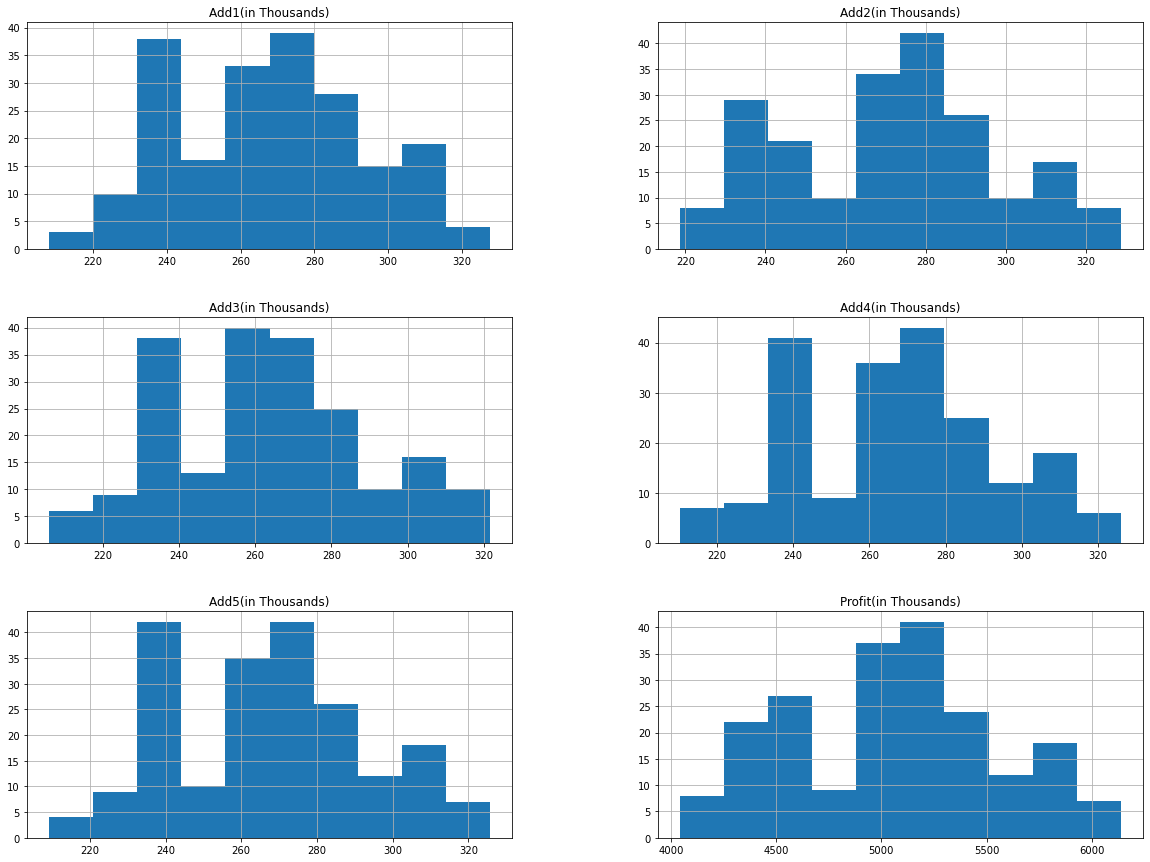

In [10]:
## Histogram visualization of the dataset
freqgraph = salesdata.select_dtypes(include=['int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

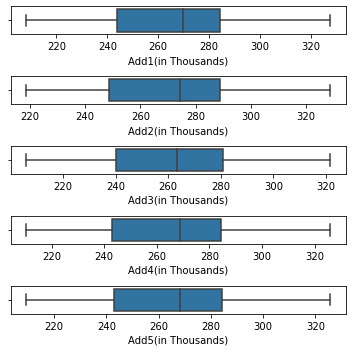

In [13]:
##outlier Analysis
import warnings 
warnings.filterwarnings("ignore")
fig,axs=plt.subplots(5,figsize=(5,5))
plt1=sns.boxplot(salesdata['Add1(in Thousands)'],ax=axs[0])
plt2=sns.boxplot(salesdata['Add2(in Thousands)'],ax=axs[1])
plt3=sns.boxplot(salesdata['Add3(in Thousands)'],ax=axs[2])
plt4=sns.boxplot(salesdata['Add4(in Thousands)'],ax=axs[3])
plt5=sns.boxplot(salesdata['Add5(in Thousands)'],ax=axs[4])
plt.tight_layout()

There are no considerable outliers present in the data

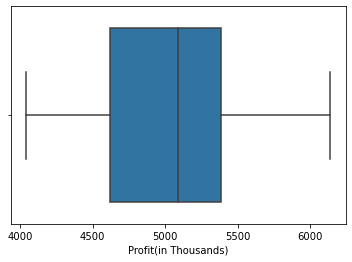

In [14]:
sns.boxplot(salesdata['Profit(in Thousands)'])
plt.show()

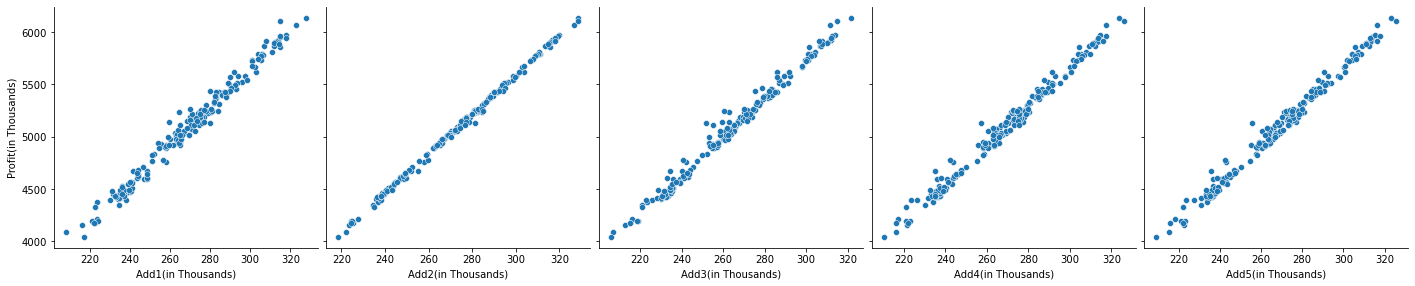

In [16]:
## How profits are related with advertisements in different companies
sns.pairplot(salesdata,x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'],y_vars='Profit(in Thousands)',height=4,aspect=1,kind='scatter')
plt.show()

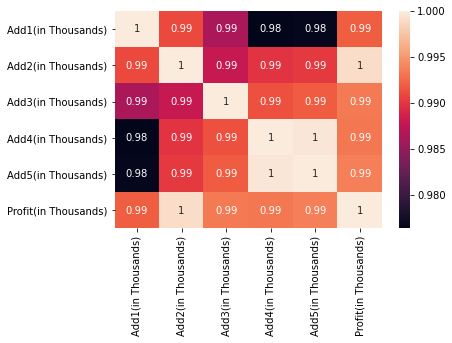

In [19]:
##Correlation between different advertising companies and profit
sns.heatmap(salesdata.corr(),annot=True)
plt.show()

## 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

<AxesSubplot:>

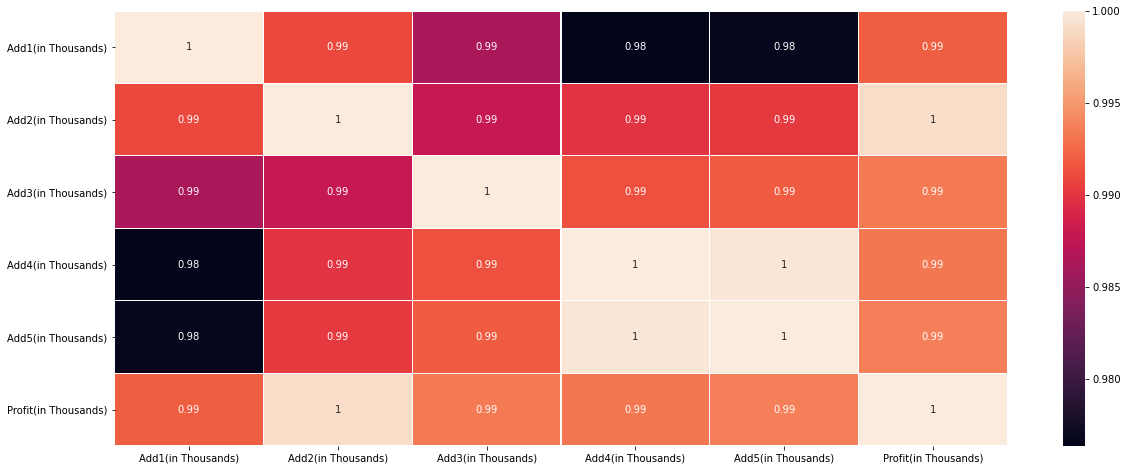

In [20]:
corrmatrix=salesdata.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2)

Insights: All advertisement companies shows a good positive correlation with profits. As is visible from the pair plot and and the heatmap, the variable Add2 (Second Advertisement company) seems to be most correlated with profits.

## 2. Build a regression model to predict the profit from the given data 

In [ ]:
## Model Building
## First assign the feature variables (Add1(in Thousands) ,Add2(in Thousands),Add3(in Thousands), Add4(in Thousands), Add5(in Thousands) ) to X and the response variable, Profits to y

In [22]:
y=salesdata['Profit(in Thousands)']
X=salesdata.drop(['Profit(in Thousands)','Date'],axis=1)
X.shape

(205, 5)

In [ ]:
## Trian-Test Split - split our variables into train and test by importing train_test_split from sklearn.model.selection library.
## Keeping 70% of the data in train dataset and the rest 30% in the test dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)
X_train.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
77,269.80,278.75,268.20,278.0,277.80
153,265.95,269.90,261.10,262.9,262.15
143,275.90,275.90,266.60,268.5,268.35
57,270.40,272.45,264.35,264.5,265.20
131,264.00,265.75,260.75,264.0,263.80


In [24]:
y_train.head()

77     5187.445
153    5019.997
143    5134.657
57     5071.736
131    4968.030
Name: Profit(in Thousands), dtype: float64

In [35]:
print('Training data count:{}'.format(X_train.shape[0]))
print('Test data count:{}'.format(X_test.shape[0]))

Training data count:143
Test data count:62


In [25]:
## Simple Linear Regression model
from sklearn import linear_model
lr= linear_model.LinearRegression()

In [26]:
model= lr.fit(X_train,y_train)

In [27]:
predictions=model.predict(X_test) ## returns results of y predictions given X data in X_test

In [38]:
print(y_test)

113    5373.275
170    5728.804
12     4464.110
73     4936.120
145    5108.626
         ...   
173    5805.521
61     5088.455
16     4175.677
103    5498.553
112    5425.190
Name: Profit(in Thousands), Length: 62, dtype: float64


In [28]:
print(predictions)

[5373.275 5728.804 4464.11  4936.12  5108.626 4178.008 5452.28  4425.005
 4506.279 4898.776 5034.726 4997.719 5030.451 5107.437 4436.321 5131.898
 4979.399 4465.95  4937.03  5767.839 4648.834 4980.446 4435.174 6137.8
 5247.011 5374.105 5580.775 4461.325 4569.293 5616.791 5244.097 5212.949
 5225.14  5078.636 5318.1   5163.322 5250.775 4671.113 5384.175 5027.633
 5043.705 6101.648 4486.38  5137.534 4486.996 5667.25  5172.76  5956.323
 4434.805 5167.878 4042.448 5359.346 5250.15  5792.175 5921.116 4599.49
 5972.337 5805.521 5088.455 4175.677 5498.553 5425.19 ]


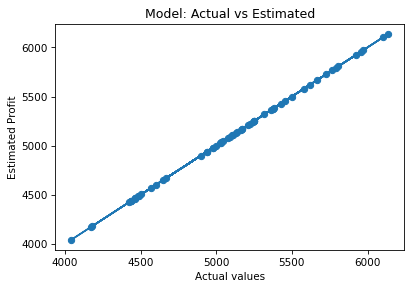

In [54]:
plt.figure(dpi=75)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test)
plt.xlabel("Actual values")
plt.ylabel("Estimated Profit")
plt.title("Model: Actual vs Estimated")
plt.show()

As we can see the predicted value is close to the actual values. That is one present in the testing data set.

In [ ]:
## Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error
## By using MSE (Mean Squared Error) approach we can find that how much the regression best fit line is close to all the residual

In [34]:
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 3.869070607102871e-25


In [46]:
from sklearn.metrics import r2_score
print('R Squared score is:',r2_score(y_test,predictions))
## By using R squared score we can find the variance or the spread of the target and feature data

R Squared score is: 1.0


In [47]:
## Root Mean Squared Error (RMSE) is used to find the more close residuals to the values found by mean squared error
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,predictions)))

Root Mean Squared Error is : 6.220185372722321e-13


In [48]:
from sklearn .metrics import mean_absolute_error
print('Mean Absolute Error is ',mean_absolute_error(y_test,predictions))
## By using MAE we can find the difference between the actual values and predicted values but that difference is absolute

Mean Absolute Error is  3.960702733527268e-13


Insights: The Mean Absolute Error values is  3.960702733527268e-13 therefore our predicted value can be  3.960702733527268e-13 more or less than the actual value. We can see that there is a positive linear relationship between the advertisement companies and profit.

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement. Add1(in Thousands)-290,Add2(in Thousands)- 312, Add3(in Thousands)-309, Add4(in Thousands) -298, Add5(in Thousands) - 320

In [49]:
new_X=[[290,312,309,298,320]]
print(model.predict(new_X))

[5820.06]


Insights: This means that if the textile company spend 290,312,309,298 and 320 on Add1(in Thousands), Add2(in Thousands),Add3(in Thousands), Add4(in Thousands) and	Add5(in Thousands) respectively , they should expect to see, on average profit 5820.06(in thousands)